## Managing conda environments

Let us first recap on how we set up a virtual conda environment last week. 

For example, we can create our environment called `sia` as follows:

- `conda create --name sia`
    
We can then activate our `sia` environment as follows:

- `conda activate sia`
    
And we can install any packages we may need, for example, we need `Git` to help us access all the content from our remote online repository:

- `conda install git`
    
    
Moreover, we will also need to install `jupyter notebook` so we can access our materials and run python code:

- `conda install jupyter notebook`

Occasionally we might have a package conflict which we need to solve by uninstalling and reinstalling the environment again, in which case we need to remove the existing `sia` env as follows:

- `conda remove --name sia --all`

You can check the environments available currently by typing:

- `conda env list`


Most information is all readily available for you to read in the Anaconda documentation on managing environments, here: https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html



# Cloning the `sia` repository from GitHub

Now we will learn how to clone the GitHub `sia` repository: https://github.com/edwardoughton/satellite-image-analysis

This will provide you with easy access to all content, materials, data etc. 

First, you need to install `Git` into your conda environment, if you do not already have it. 

*Git is a distributed version control system that tracks changes in any set of computer files, usually used for coordinating work among programmers collaboratively developing source code during software development.*

More info here: https://en.wikipedia.org/wiki/Git

Once installed and in the directory of our choosing, you can simply type `git clone` followed by the address to the code repository on `GitHub`. For example, navigate to the desktop of your machine and type `git clone https://github.com/edwardoughton/satellite-image-analysis.git`. This will clone the whole repository to your desktop.

To summarize these steps from the beginning:

1. Using the keyboard, open your Anaconda Prompt (begin typing 'Anaco...' and it should pop up).
2. Activate your conda environment (e.g., `conda activate sia`).
3. Install `Git` (e.g., `conda install git`).
4. In the prompt, navigate to where you want your folder to clone to (e.g., the desktop, using `cd`).
5. Then type `git clone https://github.com/edwardoughton/satellite-image-analysis.git`.

You should now have copied a version of the `sia` GitHub repository to your desktop!

Just be aware that if you make changes to this set of files, `Git` will not let you use a `git pull` command in the future, to prevent you from writing over any changes you have made. 

Although `Git` is highly sophisticated, the functionality provided here enables you to merely clone a reposity to your local machine, which should be sufficient for this set of tutorials. 

As you move to more advanced analysis, you should look into how you create your own repositories, and both push and pull changes. However, this is beyond the scope of this analysis.  
    

## Opening our first satellite image

Before we open our first satellite image to inspect the contents, we need to install a program capable of loading our first image. Here we will begin by using `rasterio`.

First we need to install this package into our current environment. Usually, you need to go back to the Anaconda prompt to do this (`conda install rasterio`), but this little bit of code below allows us to install from here (thankfully).

(it might take a little bit of time, so give it 1-2 minutes)


In [1]:
# Example
# Thankfully we can install rasterio into our virtual environment as follows:
import sys
!conda install --yes --prefix {sys.prefix} rasterio

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.3




Next, we need to load the package into our current environment. 

For example, we can specify this as follows, which basically brings in the entire library for us to access (using the salutation `rasterio.` as we will see later):

In [2]:
# Example
import rasterio

Now we can specify the file we want to load. 

Remember how we specify the file path relative to this notebook. 

So if we have a path with `files/20220820_154153_46_248f_3B_AnalyticMS.tif` it means go into the files folder and load in the image named `20220820_154153_46_248f_3B_AnalyticMS.tif`. 

In [3]:
# Example
filename = "files/20160831_180303_0e26_3B_AnalyticMS.tif"
filename #here we have just allocated the string to the filename object

'files/20160831_180303_0e26_3B_AnalyticMS.tif'

Now we should be ready to open our image!

Let us first just load in the whole multiband image (e.g., blue, green, red, near-infrared)

In [4]:
# Example
my_raster_image = rasterio.open("files/20220820_154153_46_248f_3B_AnalyticMS.tif")
my_raster_image.read() #this is all our layers in one very large list of lists for blue, green, red, near-infrared

array([[[4920, 5354, 5925, ..., 4710, 4803, 4902],
        [4982, 5670, 6484, ..., 4445, 4573, 4670],
        [4982, 5612, 6182, ..., 4376, 4445, 4461],
        ...,
        [4894, 4838, 4832, ..., 4468, 4465, 4435],
        [4917, 4807, 4814, ..., 4523, 4515, 4482],
        [4885, 4769, 4824, ..., 4573, 4372, 4426]],

       [[3584, 4074, 4463, ..., 3294, 3353, 3527],
        [3718, 4602, 5696, ..., 3156, 3206, 3261],
        [3762, 4586, 5386, ..., 3068, 3081, 3094],
        ...,
        [3749, 3762, 3766, ..., 2914, 2917, 2928],
        [3749, 3748, 3750, ..., 2888, 2894, 2948],
        [3728, 3732, 3735, ..., 2938, 2938, 2914]],

       [[2191, 2631, 3092, ..., 1821, 1900, 2039],
        [2366, 3043, 3725, ..., 1680, 1735, 1827],
        [2360, 2877, 3321, ..., 1559, 1562, 1598],
        ...,
        [2071, 2077, 2085, ..., 1470, 1483, 1486],
        [2114, 2053, 2040, ..., 1475, 1462, 1493],
        [2124, 2086, 2060, ..., 1512, 1501, 1485]],

       [[1350, 1559, 1672, ...,  981,

Here you can see what the underlying data look like for any satellite image we wish to analyze. 

This sets the context for what we will cover over the next 2-3 weeks, where we begin to learn how to access, manipulate and export imagery data in this structure. 

## Single layer imagery

Now we can begin to interact with our underlying image data. 

We will need to download and install `matplotlib` into our virtual environment, in order to acess this package.

In [5]:
# Example
# We will need to install matplotlib into our virtual environment
import sys
!conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.3




Now `matplotlib` is available, we can begin to play with the individual layers using the `pyplot` function. 

First, we can plot individual bands as images, as follows for the blue band:

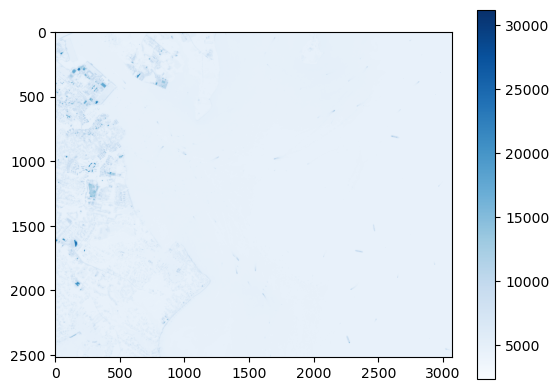

In [6]:
# Example
from matplotlib import pyplot

# Let's just get our blue band
blue = my_raster_image.read()[0]

# Use imshow to load the blue band.
fig = pyplot.imshow(blue, cmap="Blues")

# Add the colorbar to our plot
pyplot.colorbar() 

# Display the results.
pyplot.show()

Let us inspect our green band:

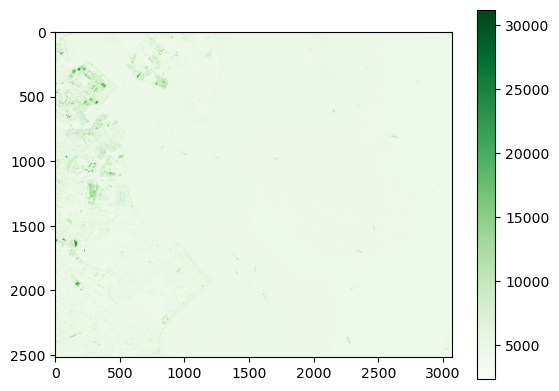

In [7]:
# Example
green = my_raster_image.read()[1]

# Use imshow to load the green band.
fig = pyplot.imshow(green, cmap='Greens')

# Add the colorbar to our plot
pyplot.colorbar() 

# Display the results.
pyplot.show()

Let us inspect our red band:

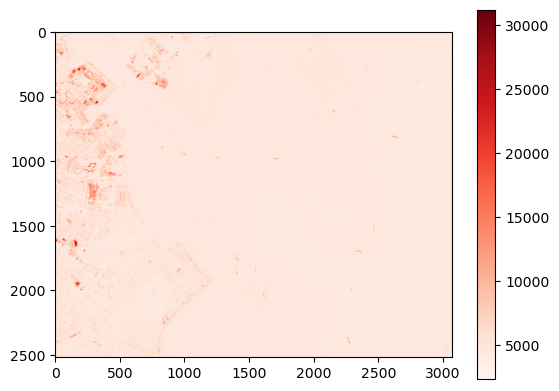

In [8]:
# Example
red = my_raster_image.read()[2]

# Use imshow to load the red band.
fig = pyplot.imshow(red, cmap='Reds')

# Add the colorbar to our plot
pyplot.colorbar() 

# Display the results.
pyplot.show()

Let us inspect our near-infrared band:

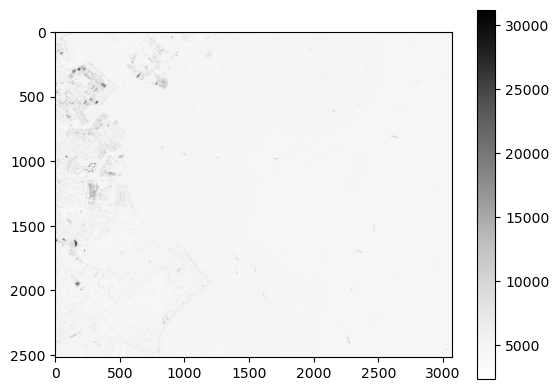

In [9]:
# Example
nir = my_raster_image.read()[3]

# Use imshow to load the nir band.
fig = pyplot.imshow(nir, cmap='Greys')

# Add the colorbar to our plot
pyplot.colorbar() 

# Display the results.
pyplot.show()

To conclude, the purpose of this tutorial has been firstly to show you how to load in a satellite image into our workspace within our virtual environment. And secondly, to demonstrate the numerical data structure which our image data reside in (as this sets the scene for the future tutorials). 